In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

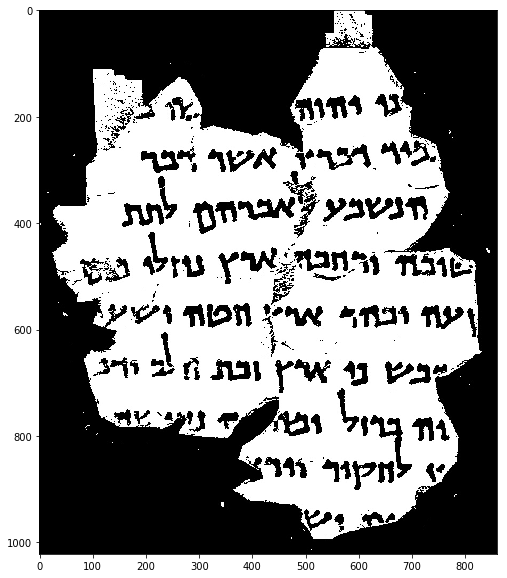

In [2]:
path = 'image-output/test7_binarized.jpg'
path_gray = 'image-output/test7_extracted.jpg'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image_gray = cv2.imread(path_gray, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (500,10))
plt.imshow(image, cmap='gray', aspect = 1)
plt.show()

In [3]:
#_, image_bin = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
image_bin = np.array(image)

In [4]:
#image_bin = 255 - image_bin
kernel = np.ones((5,5),np.uint8)
image_bin = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel)
#image_bin = 255 - image_bin

#image_bin = cv2.medianBlur(image_bin, 3)


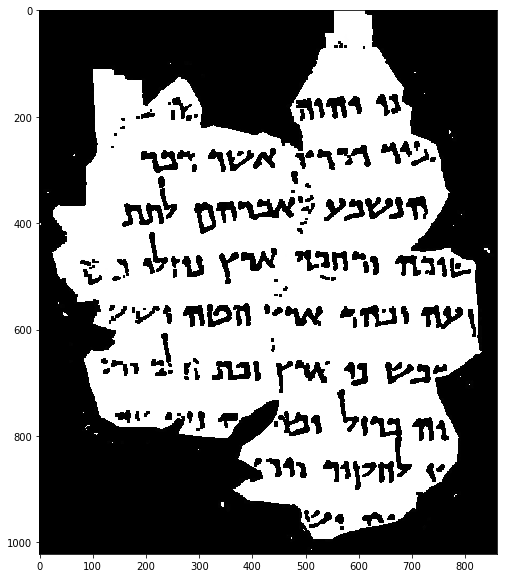

In [5]:
plt.figure(figsize = (500,10))
plt.imshow(image_bin, cmap='gray', aspect = 1)
plt.show()

In [6]:
image_bin = 255 - image_bin
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image_bin, 8, cv2.CV_32S)
image_bin = 255 - image_bin
centroids

array([[ 445.55382283,  513.04120921],
       [ 401.83155103,  504.58185156],
       [ 572.05633803,   60.49295775],
       [ 606.5       ,   62.        ],
       [ 548.        ,   68.        ],
       [ 556.5       ,   68.        ],
       [ 610.        ,   69.5       ],
       [ 645.92467043,  176.22222222],
       [ 668.2417154 ,  176.15789474],
       [ 594.58695652,  176.12450593],
       [ 560.13135187,  180.45158198],
       [ 266.74538745,  181.06642066],
       [ 501.73538012,  181.13011696],
       [ 527.48039216,  182.18627451],
       [ 244.        ,  175.        ],
       [ 209.5       ,  188.        ],
       [ 251.06832298,  196.53416149],
       [ 494.1754386 ,  196.83625731],
       [ 200.57777778,  197.9037037 ],
       [ 294.33333333,  198.05882353],
       [ 280.95535714,  202.04464286],
       [ 157.56603774,  204.8490566 ],
       [ 156.        ,  220.40384615],
       [ 142.5       ,  234.        ],
       [ 689.02747253,  260.83791209],
       [ 709.41764706,  2

In [7]:
n_labels

183

In [8]:
stats

array([[     0,      0,    847,   1014, 418159],
       [     0,      0,    860,   1022, 383493],
       [   561,     46,     22,     25,    284],
       [   604,     60,      6,      5,     30],
       [   546,     66,      5,      5,     25],
       [   553,     66,      8,      5,     40],
       [   608,     67,      5,      6,     30],
       [   632,    158,     27,     41,    531],
       [   657,    158,     23,     39,    513],
       [   581,    160,     25,     36,    506],
       [   538,    162,     42,     42,   1043],
       [   249,    164,     38,     40,    542],
       [   482,    165,     35,     41,    684],
       [   517,    166,     20,     36,    408],
       [   242,    173,      5,      5,     25],
       [   206,    186,      8,      5,     40],
       [   247,    187,      9,     20,    161],
       [   490,    186,     10,     23,    171],
       [   183,    192,     34,     13,    270],
       [   291,    195,      8,      7,     51],
       [   276,    1

In [9]:
min_thresh = 400
max_thresh = 10000
boxes = []
box_centroids = []
for i in range(len(stats)):
    if(stats[i][4] >= min_thresh and stats[i][4] <= max_thresh):
        x = stats[i][0]
        y = stats[i][1]
        width = stats[i][2]
        height = stats[i][3]
        boxes.append(stats[i])
        box_centroids.append(centroids[i])
        cv2.rectangle(image,(x,y),(x + width,y + height),(0,200,0),3)

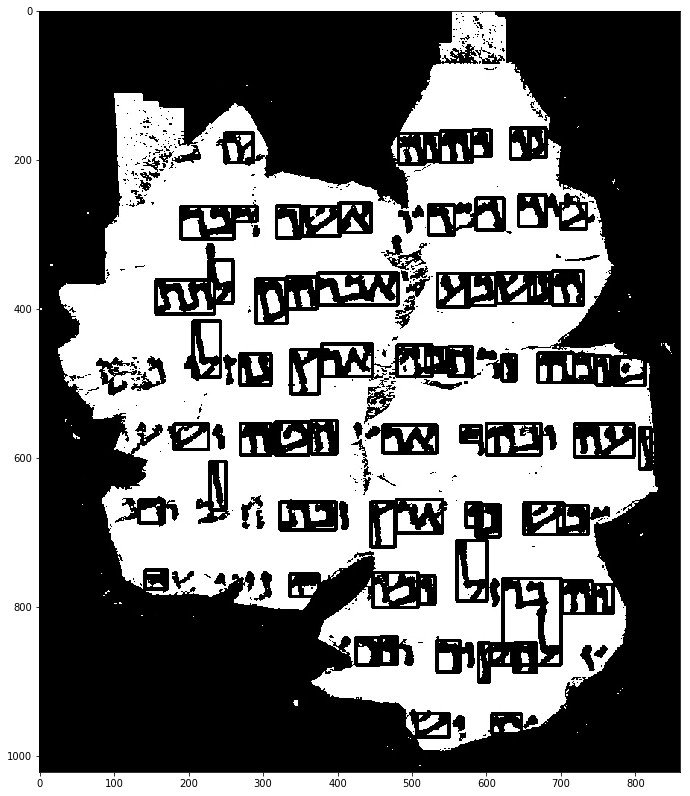

In [10]:
final_image = np.copy(image)
plt.figure(figsize = (500,14))
plt.imshow(final_image, cmap='gray', aspect = 1)
plt.show()

In [11]:
avg_width = 0
avg_height = 0
N = len(boxes)

In [12]:
for box in boxes:
    avg_width += box[2]
    avg_height += box[3]
avg_width /= N
avg_height /= N

avg_height *= 1

In [13]:
avg_width

40.541666666666664

In [14]:
avg_height

42.763888888888886

In [15]:
word_lines = []
line = []
# add first box to first line
line.append(boxes.pop(0))
previous_centroid = box_centroids[0][1]
box_centroids.pop(0)
for i in range(len(boxes)):
    box = boxes[i]
    #check if box belongs to the same line as the previous one: check if centroid of box falls within the range of the previous
    #box
    centroid_y = box_centroids[i][1]
    if(centroid_y >= (previous_centroid - avg_height) and (centroid_y <= previous_centroid + avg_height)):
        line.append(box)
        previous_centroid = centroid_y
    else:
        #if not, add the line to the collection of lines and start a new one
        if(line != []):
            word_lines.append(line)
            line = []
            previous_centroid = centroid_y
            line.append(box)
    
    
    
    

In [16]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
height,width = image.shape
print(word_lines)

[[array([632, 158,  27,  41, 531], dtype=int32), array([657, 158,  23,  39, 513], dtype=int32), array([581, 160,  25,  36, 506], dtype=int32), array([ 538,  162,   42,   42, 1043], dtype=int32), array([249, 164,  38,  40, 542], dtype=int32), array([482, 165,  35,  41, 684], dtype=int32), array([517, 166,  20,  36, 408], dtype=int32)], [array([643, 248,  37,  42, 694], dtype=int32), array([586, 252,  37,  43, 689], dtype=int32), array([402, 258,  43,  40, 910], dtype=int32), array([699, 259,  35,  34, 430], dtype=int32), array([522, 261,  35,  40, 621], dtype=int32), array([ 190,  263,   71,   44, 1509], dtype=int32), array([260, 263,  32,  20, 414], dtype=int32), array([318, 262,  33,  43, 619], dtype=int32), array([352, 263,  52,  40, 894], dtype=int32)], [array([228, 335,  32,  57, 727], dtype=int32), array([ 688,  350,   42,   45, 1039], dtype=int32), array([ 374,  352,  107,   43, 2251], dtype=int32), array([534, 353,  43,  45, 857], dtype=int32), array([ 613,  352,   52,   41, 111

In [17]:
line_image = np.array(image)

In [18]:
#save strips
strips = []
# draw lines for the first strip
for line in word_lines:
    min_height = 99999
    max_height = 0
    for box in line:
        if(box[1] < min_height):
            min_height = box[1]
        if(box[1] + box[3]  > max_height):
            max_height = box[1] + box[3] 
    cv2.line(line_image,(0,min_height),(width, min_height),(0,200,0),3)   
    strips.append([min_height, max_height])
   


        
print(min_height)
print(max_height)
cv2.line(line_image,(0,max_height),(width, max_height),(0,200,0),3) 

840
901


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

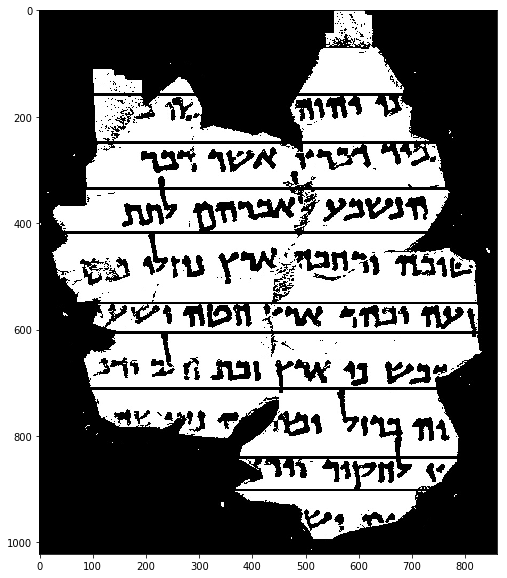

In [19]:
plt.figure(figsize = (500,10))
plt.imshow(line_image, cmap='gray', aspect = 1)
plt.show()

335 420


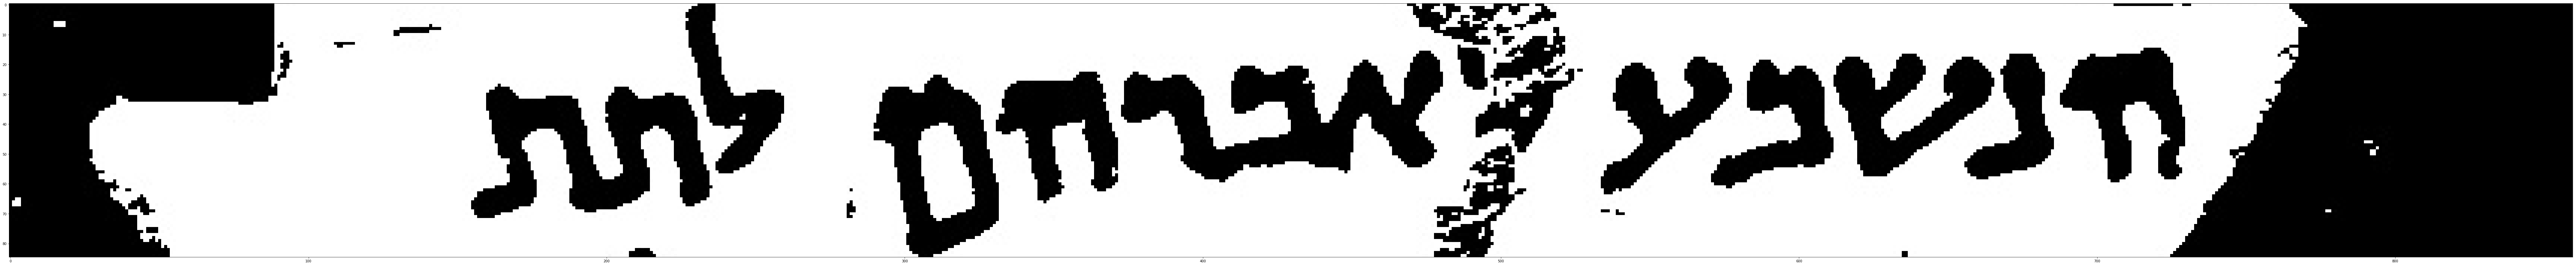

In [20]:
[y1, y2] = strips[2] 

strip_img = image[y1:y2, 0:width]
strip_img_gray = image_gray[y1:y2, 0:width]
print(y1,y2)
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

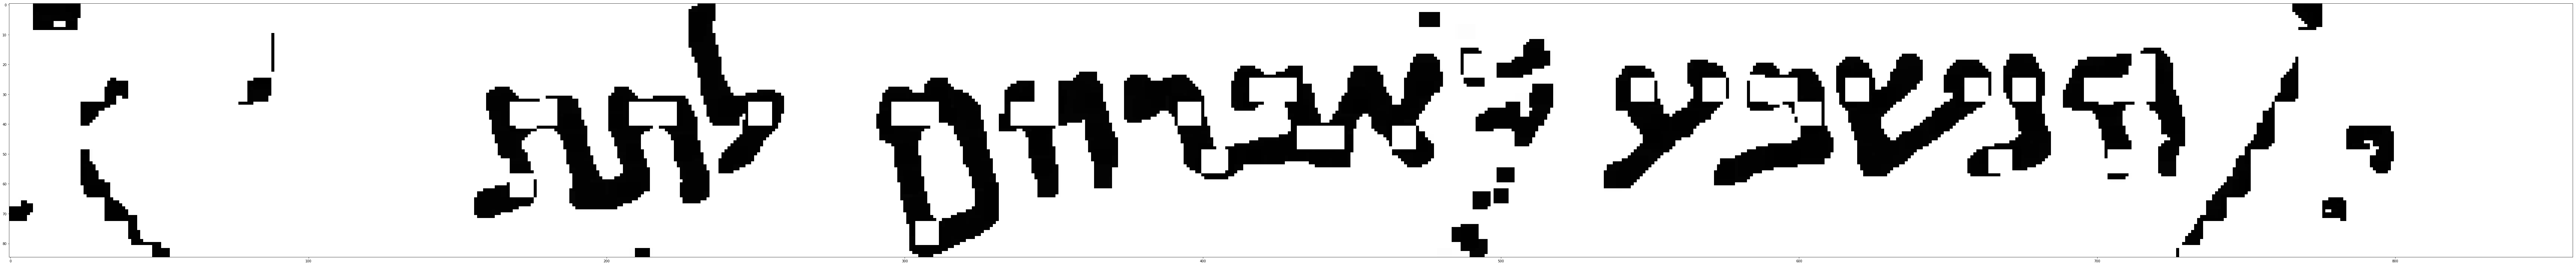

In [21]:
strip_img = cv2.morphologyEx(strip_img, cv2.MORPH_CLOSE, kernel)
#strip_img = cv2.GaussianBlur(strip_img, (5,5) , 0)
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(strip_img, 8, cv2.CV_32S)
n_labels
mx = 0
background_index = 0
"""for i in range(len(stats)):
    if(stats[i][0] == 0 and stats[i][1] == 0):
        background_index = i
background = stats[background_index]

height, width = strip_img.shape
for i in range(height):
    for j in range(width):
        if(labels[i][j] == background_index):
            strip_img[i][j] = 255
"""

strip_img[strip_img == 0] = 255

plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [22]:
strip_img = 255 - strip_img

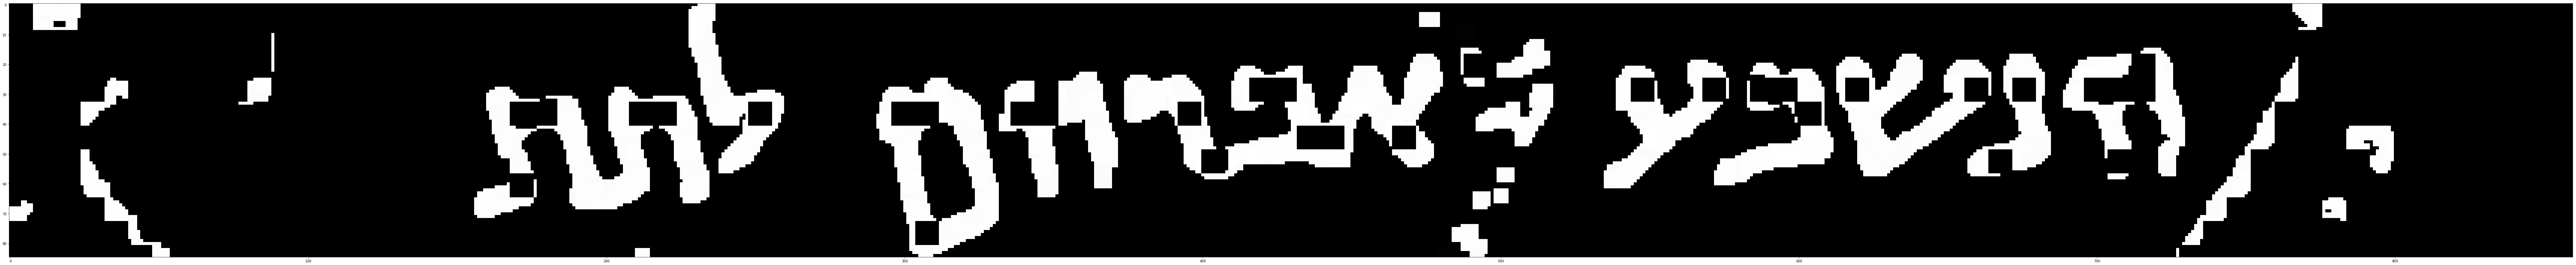

In [23]:
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [24]:
strip_img = cv2.dilate(strip_img,kernel,iterations = 2)
strip_img = cv2.GaussianBlur(strip_img, (9,9), 0)
_, strip_img = cv2.threshold(strip_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



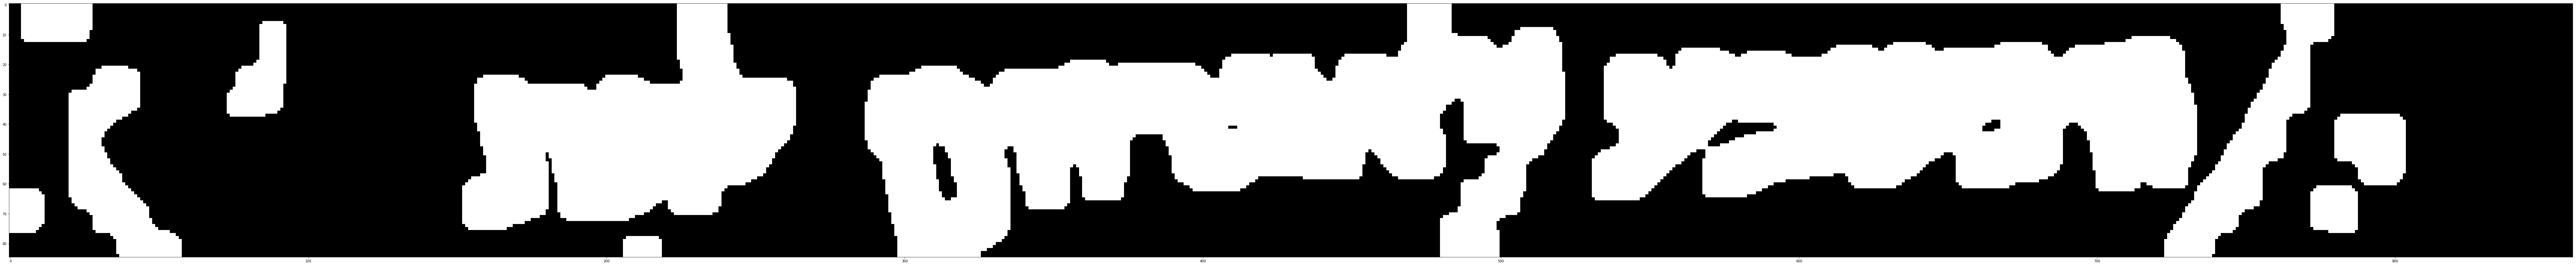

In [25]:
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [26]:
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(strip_img, 8, cv2.CV_32S)

In [27]:
n_labels

12

In [28]:
stats

array([[    0,     0,   860,    85, 44340],
       [    4,     0,    24,    13,   306],
       [  152,     0,   112,    76,  5028],
       [  287,     0,   235,    85, 10662],
       [  723,     0,    57,    85,  1484],
       [   73,     6,    20,    32,   428],
       [  531,    11,   203,    55,  8668],
       [   20,    21,    38,    64,  1184],
       [  780,    37,    24,    24,   498],
       [  772,    61,    16,    16,   242],
       [    0,    62,    12,    15,   171],
       [  206,    78,    13,     7,    89]], dtype=int32)

In [29]:
idx = 3

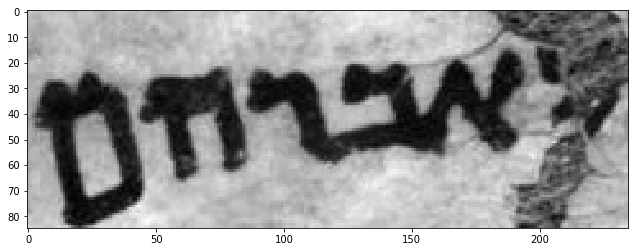

In [30]:
strip_img = image[y1:y2, 0:stats[0][2]]
plt.figure(figsize = (500,4))
#plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.imshow(strip_img_gray[stats[idx][1]:stats[idx][1]+stats[idx][3], stats[idx][0]:stats[idx][0]+stats[idx][2]], cmap='gray', aspect = 1)
plt.show()


#write found words to folder
counter = 1
for i in range(n_labels):
    if(stats[i][4] > 1000 and i != 0):
        word = strip_img[stats[i][1]:stats[i][1]+stats[i][3], stats[i][0]:stats[i][0]+stats[i][2]]
        path = 'word-images/word' + str(counter) + '.png'
        counter += 1
        cv2.imwrite(path, word)
        





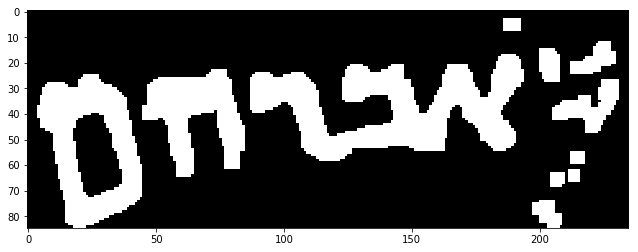

12

array([[    0,     0,   235,    85, 14911],
       [  186,     3,     7,     5,    35],
       [  212,    12,    18,    13,   135],
       [  200,    15,     8,    13,    96],
       [   87,    17,   107,    42,  2163],
       [   45,    23,    40,    42,   910],
       [    4,    25,    41,    60,  1279],
       [  205,    27,    26,    21,   264],
       [  212,    55,     6,     5,    30],
       [  204,    63,     6,     6,    35],
       [  211,    62,     5,     5,    25],
       [  197,    74,    12,    11,    92]], dtype=int32)